<a href="https://colab.research.google.com/github/KOL0987/SLR-assignment/blob/main/SLR_q(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data=pd.read_csv('/content/Salary_Data.csv')


EDA


In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [ ]:
data[data.duplicated()] 

,YearsExperience,Salary


In [ ]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
data=data.rename({'YearsExperience':'YExp'},axis=1)
data


,YExp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Data Visualisation


<Axes: >

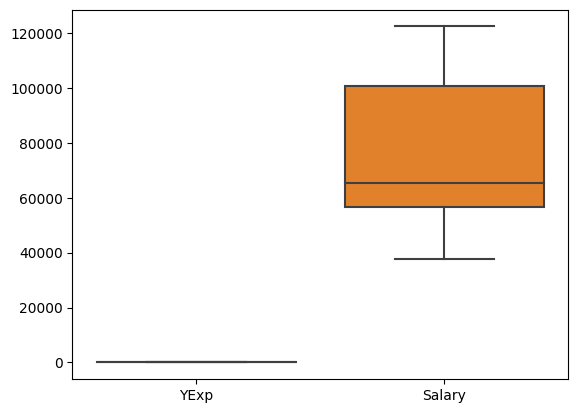

In [ ]:
sns.boxplot(data)

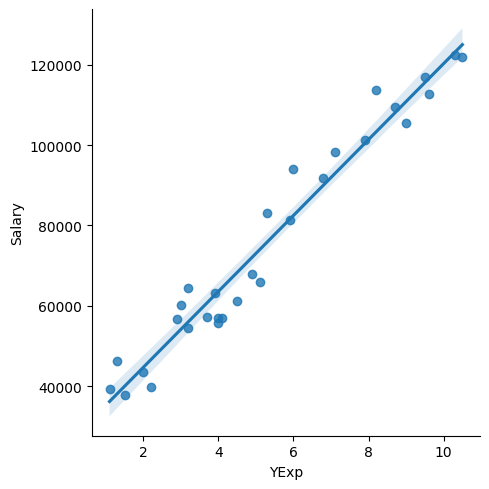

In [ ]:
sns.lmplot(data,x='YExp',y='Salary')

Correlation

In [ ]:
data.corr()

,YExp,Salary
YExp,1.000000,0.978242
Salary,0.978242,1.000000


Model Building


In [ ]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YExp',data).fit()

Model Testing

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        19:26:35   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YExp        9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#parameters
model.params

Intercept    25792.200199
YExp          9449.962321
dtype: float64

In [ ]:
#pvalue and tvalue
model.tvalues


Intercept    11.346940
YExp         24.950094
dtype: float64

In [ ]:
model.pvalues

Intercept    5.511950e-12
YExp         1.143068e-20
dtype: float64

Predictiction for Salary_hike

In [ ]:
newval=pd.Series([5,2,4,9])
newval

0    5
1    2
2    4
3    9
dtype: int64

In [ ]:
pred_sal=pd.DataFrame(newval,columns=['YExp'])

In [ ]:
model.predict(pred_sal)

0     73042.011806
1     44692.124842
2     63592.049484
3    110841.861092
dtype: float64

In [ ]:
pred_sal['Pre_salary']=model.predict(pred_sal)

In [ ]:
round(pred_sal)

,YExp,Pre_salary
0,5,73042.0
1,2,44692.0
2,4,63592.0
3,9,110842.0


<Axes: xlabel='YExp', ylabel='Pre_salary'>

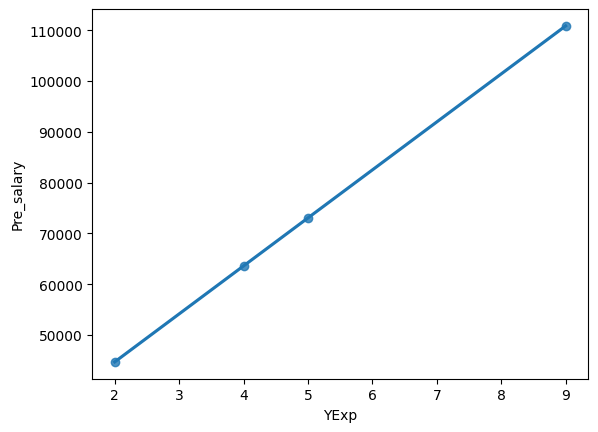

In [ ]:
#scatter plot of predicted salary
sns.regplot(x='YExp',y='Pre_salary',data=pred_sal)

Building the model by transformation

Normalisation


In [ ]:
data1=data
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data1_scale=pd.DataFrame(ms.fit_transform(data1))
x=data1_scal.iloc[:,0]
y=data1_scal.iloc[:,-1]

In [ ]:
model=smf.ols('y~x',data=data1).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        19:28:58   Log-Likelihood:                 41.053
No. Observations:                  30   AIC:                            -78.11
Df Residuals:                      28   BIC:                            -75.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0359      0.020      1.777      0.086      -0.005       0.077
x              0.9120      0.037     24.950      0.000       0.837       0.987
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Standardization

In [ ]:
data2=data1
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data2_scale=pd.DataFrame(ss.fit_transform(data2))
x=data2_scal.iloc[:,0]
y=data2_scal.iloc[:,-1]

In [ ]:
model=smf.ols('y~x',data=data2_scale).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        19:31:21   Log-Likelihood:                 41.053
No. Observations:                  30   AIC:                            -78.11
Df Residuals:                      28   BIC:                            -75.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0359      0.020      1.777      0.086      -0.005       0.077
x              0.9120      0.037     24.950      0.000       0.837       0.987
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Log Transformation

In [ ]:
data2_scale = np.log(data2)
x=data2_scal.iloc[:,0]
y=data2_scal.iloc[:,-1]

In [ ]:
model=smf.ols("y~x",data=data2_scale).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           7.40e-16
Time:                        19:33:08   Log-Likelihood:                 7.4195
No. Observations:                  30   AIC:                            -10.84
Df Residuals:                      28   BIC:                            -8.037
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.4901      1.101    -14.977      0.000     -18.745     -14.235
x              1.6104      0.098     16.353      0.000       1.409       1.812
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.142
Skew:                          -0.840   Prob(JB):                       0.0765
Kurtosis:                       4.136   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Squreroot Transformation

In [ ]:
data2_scale = np.sqrt(data2)
x=data2_scal.iloc[:,0]
y=data2_scal.iloc[:,-1]

In [ ]:
model=smf.ols("y~x",data=data2_scale).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           7.40e-16
Time:                        19:36:17   Log-Likelihood:                 7.4195
No. Observations:                  30   AIC:                            -10.84
Df Residuals:                      28   BIC:                            -8.037
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.4901      1.101    -14.977      0.000     -18.745     -14.235
x              1.6104      0.098     16.353      0.000       1.409       1.812
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.142
Skew:                          -0.840   Prob(JB):                       0.0765
Kurtosis:                       4.136   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""